___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
#Impporting Libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV


In [2]:
#Reading The Data
df= pd.read_csv("/content/Churn_Modelling.csv")


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
# checking for duplicates
df.duplicated().sum()

0

In [8]:
# checking for nulls
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df.shape

(10000, 14)

This dataset consists of 14 columns. It has 13 features about the employee and a target attribute as " Exited" that tells whether the person leaves the bank or not.

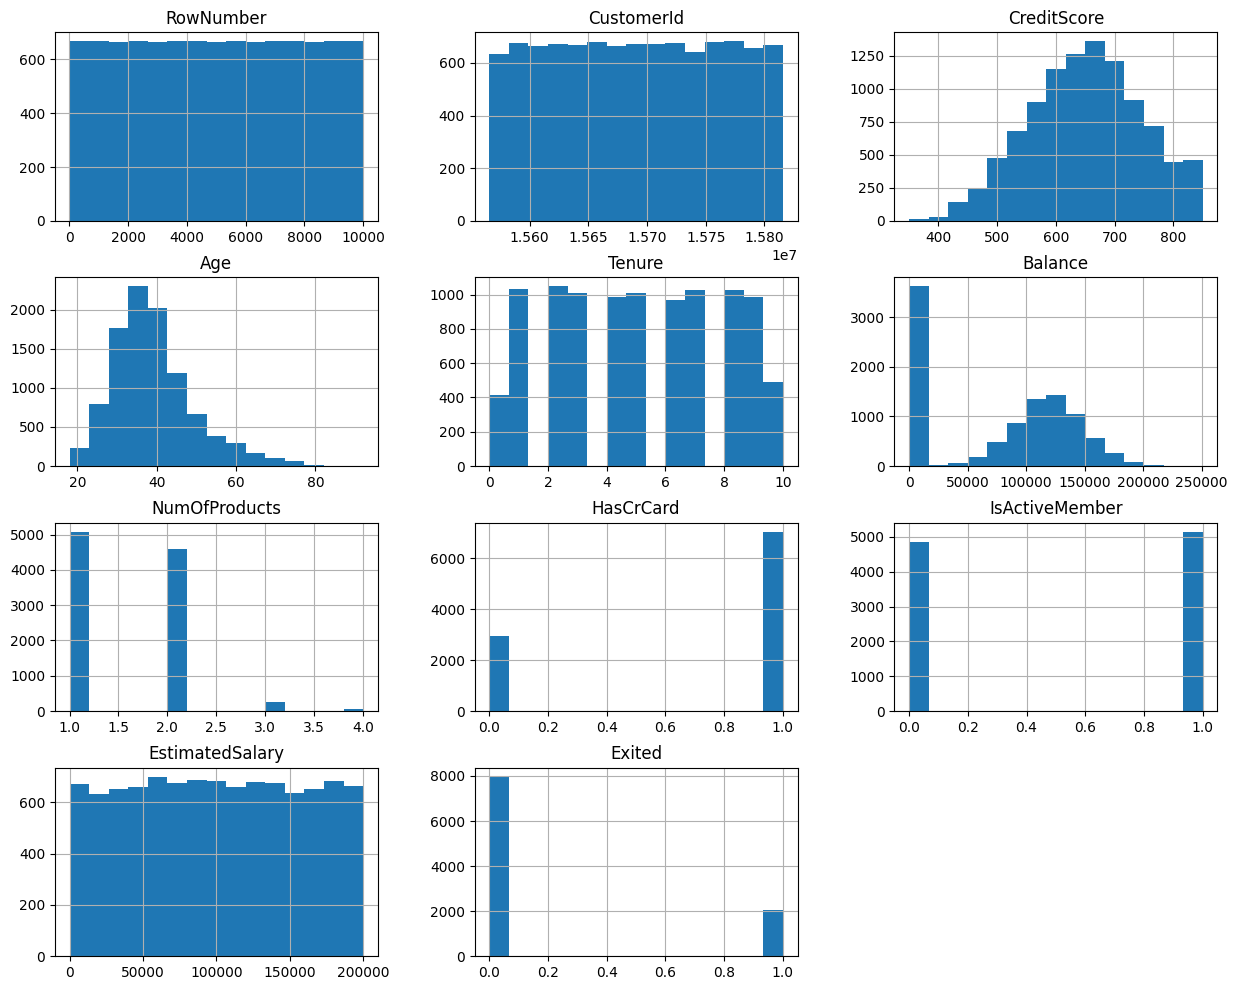

In [10]:
df.hist(figsize=(15,12), bins=15);

<ipython-input-11-7551f982dcd6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


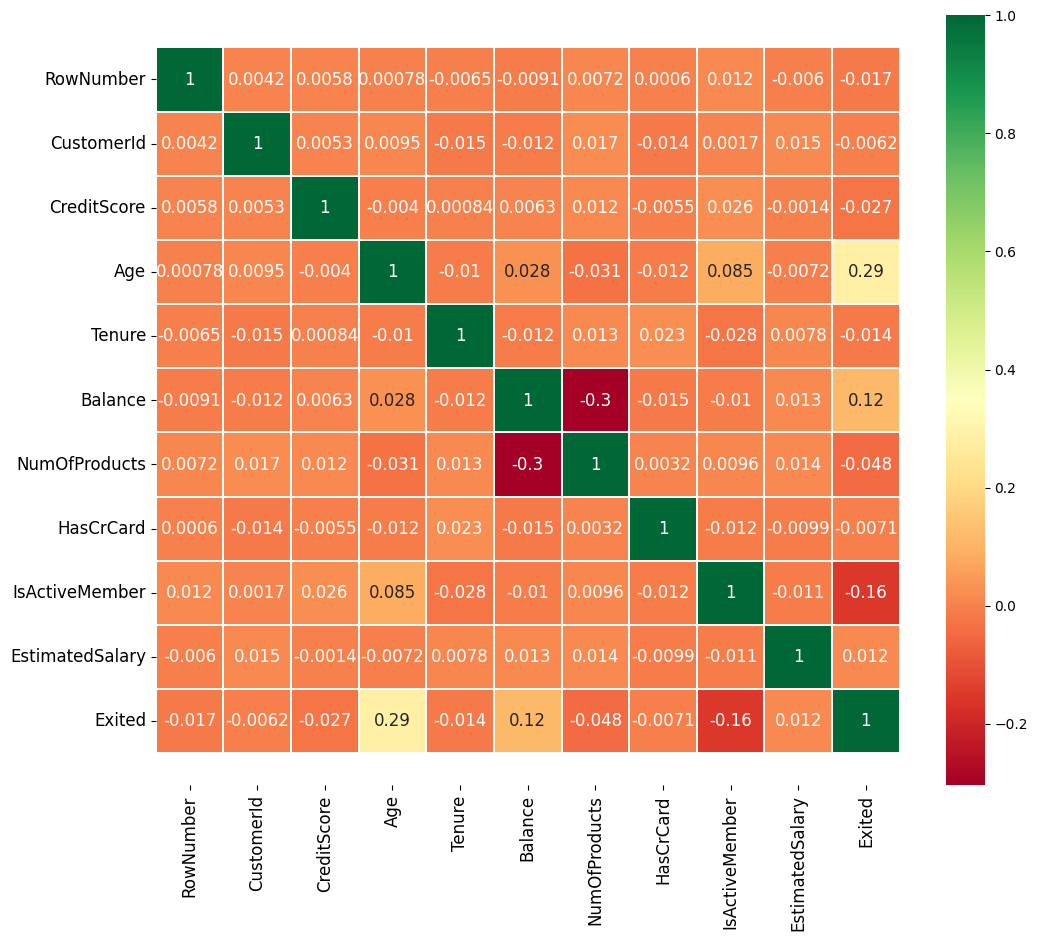

In [11]:
#Correlation between all variables using Heatmap
corr = df.corr()
ax = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.1,annot_kws={'size':12})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
fig=plt.gcf()
fig.set_size_inches(12,10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [12]:
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)

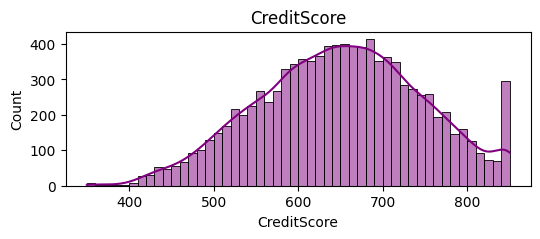

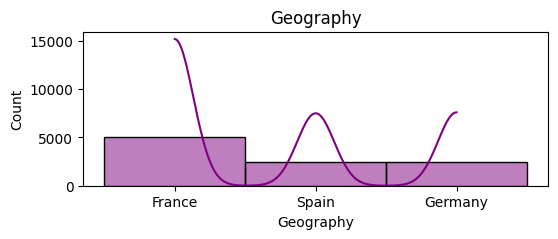

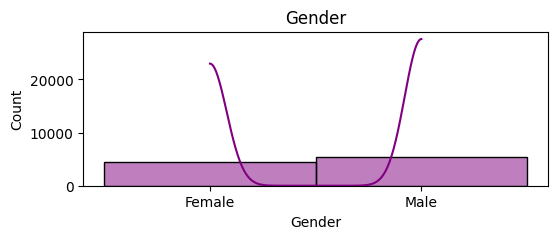

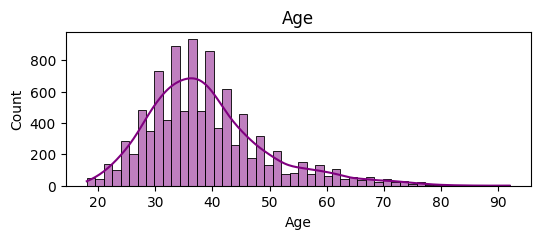

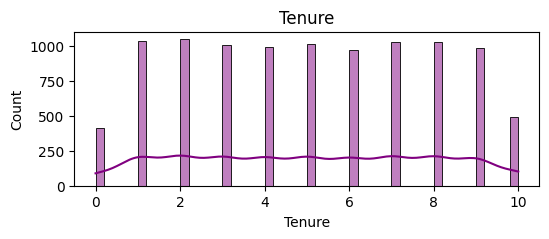

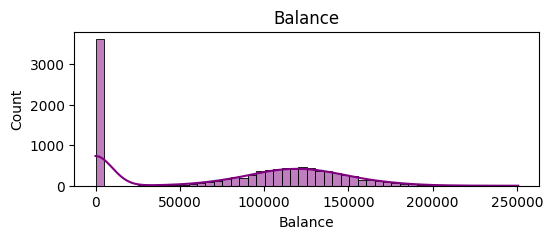

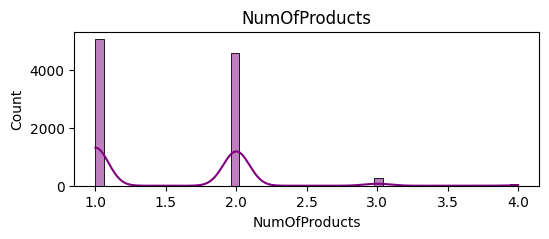

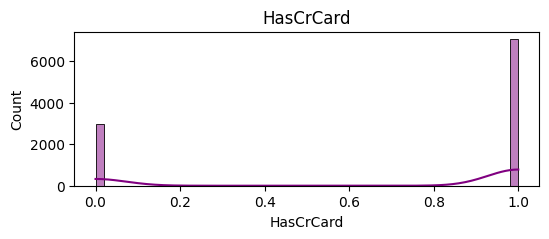

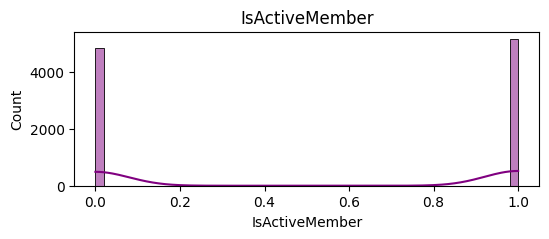

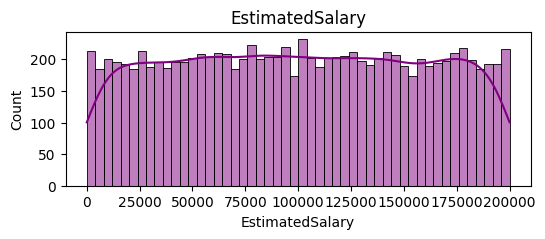

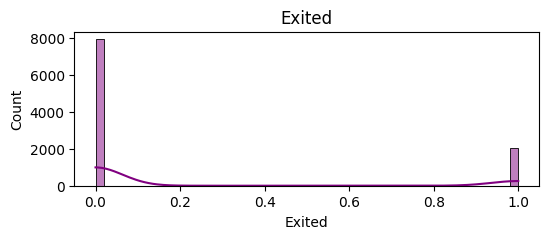

In [13]:
# visualizing the dist of columns
for column in df:
        plt.figure(figsize=(6,2))
        sns.histplot(df[column], bins=50, kde=True, color= 'purple')
        plt.title(f'{column}');


Removing the unnecessary columns and splitting the target attribute for training.

In [15]:
label1 = LabelEncoder()
df['Gender'] = label1.fit_transform(df['Gender'])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


<Axes: xlabel='Gender', ylabel='count'>

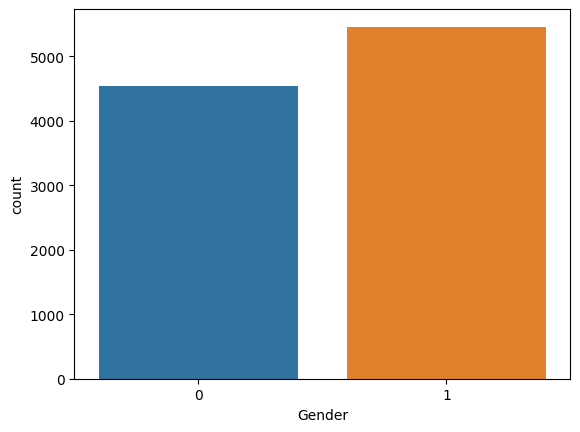

In [16]:
sns.countplot(x ='Gender', data = df)


In [17]:
df['Geography'].value_counts()


France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

<Axes: xlabel='Geography', ylabel='count'>

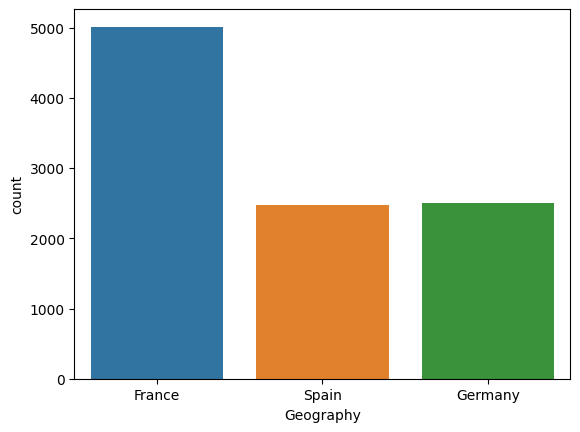

In [18]:
sns.countplot(x ='Geography', data = df)


In [19]:
df= pd.get_dummies(df, prefix=['geo'],columns=['Geography'])
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,geo_France,geo_Germany,geo_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [20]:
df.groupby(['Gender']).mean()['CreditScore'].sort_values()

Gender
1    650.276892
0    650.831389
Name: CreditScore, dtype: float64

In [21]:
df.groupby(['Gender']).mean()['Balance'].sort_values()

Gender
0    75659.369139
1    77173.974506
Name: Balance, dtype: float64

In [22]:
df.groupby(['Gender']).mean()['EstimatedSalary'].sort_values()

Gender
1     99664.576931
0    100601.541382
Name: EstimatedSalary, dtype: float64

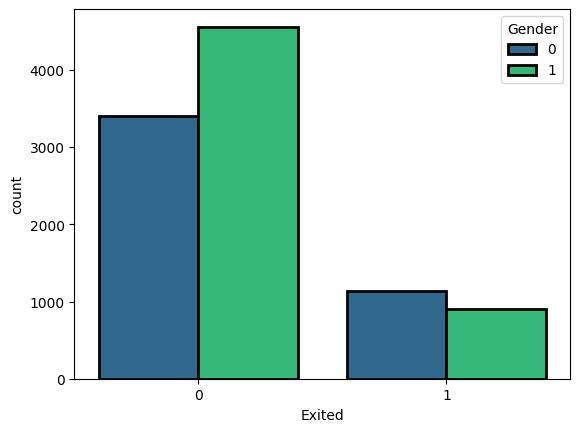

In [23]:
sns.countplot(x='Exited', hue='Gender', data=df,saturation=1, edgecolor='k',
            linewidth=2, palette= 'viridis')
plt.show()

# Preprocessing of Data
- Train | Test Split, Scalling

In [24]:
seed = 40

In [25]:
X = df.drop(columns="Exited")
y = df["Exited"]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.10, random_state=seed
)

In [27]:
scaler = MinMaxScaler()

In [28]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

In [29]:
pip install keras

In [30]:
#Create a variable to represent the ANN model as an instance
model = Sequential([
        keras.layers.Dense(units=32,activation="relu",kernel_initializer="normal",input_dim = 12), #input layer and hidden layer
        keras.layers.Dense(units=16,activation="relu",kernel_initializer="normal"), #hidden layer
        keras.layers.Dense(units=1,activation="sigmoid",kernel_initializer="normal") #output layer
      ])

In [94]:
from tensorflow.keras.optimizers import Adam
opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [32]:
model.fit(
    x=X_train, y=y_train, validation_split=0.1, batch_size=120, epochs=1000, verbose=1
)

Epoch 1/1000
68/68 [==============================] - 9s 16ms/step - loss: 0.6136 - recall: 5.9809e-04 - val_loss: 0.4652 - val_recall: 0.0000e+00
Epoch 2/1000
68/68 [==============================] - 1s 7ms/step - loss: 0.4954 - recall: 0.0000e+00 - val_loss: 0.4476 - val_recall: 0.0000e+00
Epoch 3/1000
68/68 [==============================] - 0s 6ms/step - loss: 0.4815 - recall: 0.0000e+00 - val_loss: 0.4399 - val_recall: 0.0000e+00
Epoch 4/1000
68/68 [==============================] - 0s 4ms/step - loss: 0.4728 - recall: 0.0000e+00 - val_loss: 0.4317 - val_recall: 0.0000e+00
Epoch 5/1000
68/68 [==============================] - 0s 4ms/step - loss: 0.4670 - recall: 0.0000e+00 - val_loss: 0.4286 - val_recall: 0.0000e+00
Epoch 6/1000
68/68 [==============================] - 0s 4ms/step - loss: 0.4612 - recall: 0.0000e+00 - val_loss: 0.4196 - val_recall: 0.0000e+00
Epoch 7/1000
68/68 [==============================] - 0s 4ms/step - loss: 0.4560 - recall: 0.0000e+00 - val_loss: 0.4161 - 

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                416       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 961 (3.75 KB)
Trainable params: 961 (3.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.613559,0.000598,0.465219,0.0
1,0.495395,0.000000,0.447578,0.0
2,0.481489,0.000000,0.439928,0.0
3,0.472831,0.000000,0.431734,0.0
4,0.467018,0.000000,0.428592,0.0


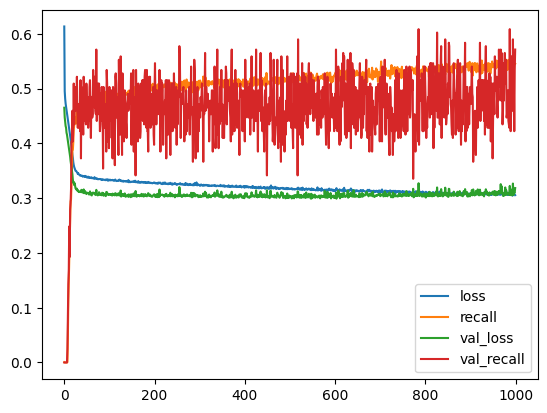

In [35]:
loss_df.plot()
plt.show()

In [36]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.3734602630138397
accuracy:  0.4901960790157318


In [37]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[735  61]
 [104 100]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       796
           1       0.62      0.49      0.55       204

    accuracy                           0.83      1000
   macro avg       0.75      0.71      0.72      1000
weighted avg       0.82      0.83      0.83      1000



## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [38]:
tf.random.set_seed(seed)
tf.keras.backend.clear_session()

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(10, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [39]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight("balanced", classes = np.unique(y_train), y = y_train)
class_weights = {0 : class_weights[0], 1 : class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [40]:
model.fit(x = X_train,
          y = y_train,
          validation_split = 0.1,
          batch_size = 128,
          epochs = 300,
          verbose = 1,
          class_weight = class_weights)

Epoch 1/300
64/64 [==============================] - 2s 7ms/step - loss: 0.6998 - recall: 0.1728 - val_loss: 0.6850 - val_recall: 0.0000e+00
Epoch 2/300
64/64 [==============================] - 0s 5ms/step - loss: 0.6927 - recall: 0.3774 - val_loss: 0.6498 - val_recall: 0.2857
Epoch 3/300
64/64 [==============================] - 0s 5ms/step - loss: 0.6782 - recall: 0.3762 - val_loss: 0.6149 - val_recall: 0.5714
Epoch 4/300
64/64 [==============================] - 0s 4ms/step - loss: 0.6600 - recall: 0.5724 - val_loss: 0.5850 - val_recall: 0.5776
Epoch 5/300
64/64 [==============================] - 0s 5ms/step - loss: 0.6272 - recall: 0.6441 - val_loss: 0.6080 - val_recall: 0.6273
Epoch 6/300
64/64 [==============================] - 0s 4ms/step - loss: 0.6054 - recall: 0.6812 - val_loss: 0.5554 - val_recall: 0.6273
Epoch 7/300
64/64 [==============================] - 0s 5ms/step - loss: 0.5933 - recall: 0.6794 - val_loss: 0.6251 - val_recall: 0.7205
Epoch 8/300
64/64 [==================

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

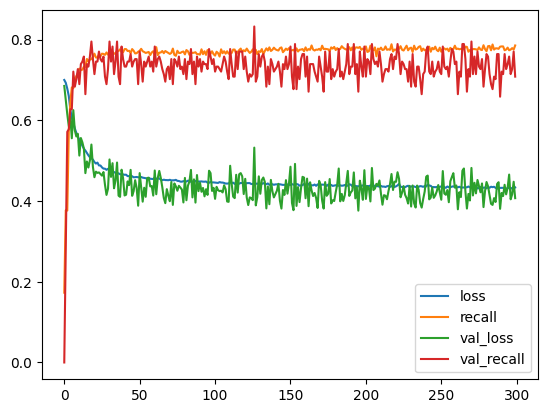

In [41]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [42]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[640 156]
 [ 59 145]]
              precision    recall  f1-score   support

           0       0.92      0.80      0.86       796
           1       0.48      0.71      0.57       204

    accuracy                           0.79      1000
   macro avg       0.70      0.76      0.72      1000
weighted avg       0.83      0.79      0.80      1000



In [43]:
from sklearn.metrics import precision_recall_curve


32/32 [==============================] - 0s 2ms/step


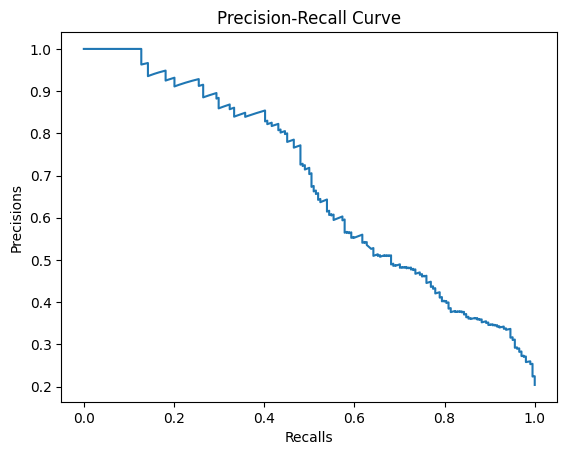

In [44]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label = "ANN")
plt.xlabel("Recalls")
plt.ylabel("Precisions")
plt.title("Precision-Recall Curve")
plt.show()

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method

### Increase The Learning Rate and Observe The Results

In [45]:
tf.random.set_seed(seed)
tf.keras.backend.clear_session()

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(10, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [46]:
model.fit(x = X_train,
          y = y_train,
          validation_split = 0.1,
          batch_size = 128,
          epochs = 1000,
          verbose = 1,
          class_weight = class_weights)

Epoch 1/1000
64/64 [==============================] - 2s 11ms/step - loss: 0.7237 - recall: 0.8876 - val_loss: 0.7086 - val_recall: 0.7453
Epoch 2/1000
64/64 [==============================] - 0s 7ms/step - loss: 0.6835 - recall: 0.5987 - val_loss: 0.6723 - val_recall: 0.4286
Epoch 3/1000
64/64 [==============================] - 0s 7ms/step - loss: 0.6609 - recall: 0.4731 - val_loss: 0.6726 - val_recall: 0.6149
Epoch 4/1000
64/64 [==============================] - 0s 7ms/step - loss: 0.6298 - recall: 0.6358 - val_loss: 0.5865 - val_recall: 0.6273
Epoch 5/1000
64/64 [==============================] - 0s 7ms/step - loss: 0.6077 - recall: 0.6609 - val_loss: 0.5918 - val_recall: 0.6770
Epoch 6/1000
64/64 [==============================] - 0s 7ms/step - loss: 0.5947 - recall: 0.7057 - val_loss: 0.5614 - val_recall: 0.6646
Epoch 7/1000
64/64 [==============================] - 0s 6ms/step - loss: 0.5884 - recall: 0.7057 - val_loss: 0.6136 - val_recall: 0.7267
Epoch 8/1000
64/64 [=============

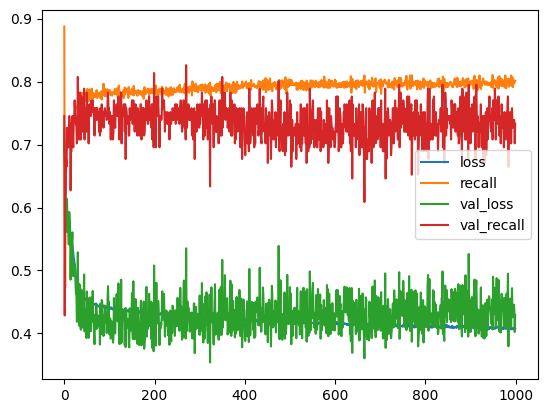

In [47]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();


In [48]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[619 177]
 [ 60 144]]
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       796
           1       0.45      0.71      0.55       204

    accuracy                           0.76      1000
   macro avg       0.68      0.74      0.69      1000
weighted avg       0.82      0.76      0.78      1000



### Add Dropout Layer

In [49]:
from keras.layers import Dropout


In [50]:
tf.random.set_seed(seed)
tf.keras.backend.clear_session()

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(10, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(4, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [51]:
model.fit(x = X_train,
          y = y_train,
          validation_split = 0.1,
          batch_size = 128,
          epochs = 400,
          verbose = 1,
          class_weight = class_weights)

Epoch 1/400
64/64 [==============================] - 3s 8ms/step - loss: 0.6963 - recall: 0.3152 - val_loss: 0.6884 - val_recall: 0.3540
Epoch 2/400
64/64 [==============================] - 0s 5ms/step - loss: 0.6901 - recall: 0.4348 - val_loss: 0.6939 - val_recall: 0.5342
Epoch 3/400
64/64 [==============================] - 0s 5ms/step - loss: 0.6858 - recall: 0.4019 - val_loss: 0.7052 - val_recall: 0.6087
Epoch 4/400
64/64 [==============================] - 1s 8ms/step - loss: 0.6785 - recall: 0.5167 - val_loss: 0.6907 - val_recall: 0.5528
Epoch 5/400
64/64 [==============================] - 0s 7ms/step - loss: 0.6767 - recall: 0.4839 - val_loss: 0.6715 - val_recall: 0.5776
Epoch 6/400
64/64 [==============================] - 0s 7ms/step - loss: 0.6693 - recall: 0.5042 - val_loss: 0.6663 - val_recall: 0.5901
Epoch 7/400
64/64 [==============================] - 0s 6ms/step - loss: 0.6688 - recall: 0.5060 - val_loss: 0.6607 - val_recall: 0.5901
Epoch 8/400
64/64 [======================

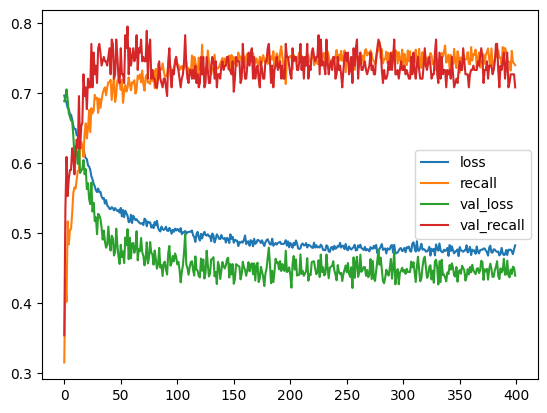

In [52]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [53]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[628 168]
 [ 57 147]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       796
           1       0.47      0.72      0.57       204

    accuracy                           0.78      1000
   macro avg       0.69      0.75      0.71      1000
weighted avg       0.82      0.78      0.79      1000



### Add Early Stop

In [54]:
from keras.callbacks import EarlyStopping


#### Monitor the "val_loss" as metric

In [55]:
tf.random.set_seed(seed)
tf.keras.backend.clear_session()

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(10, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(4, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [56]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 100, restore_best_weights = True)

In [57]:
model.fit(x = X_train,
          y = y_train,
          validation_split = 0.1,
          batch_size = 128,
          epochs = 400,
          verbose = 1,
          class_weight = class_weights,
          callbacks = [early_stop])

Epoch 1/400
64/64 [==============================] - 2s 7ms/step - loss: 0.6927 - recall: 0.6106 - val_loss: 0.7022 - val_recall: 0.6832
Epoch 2/400
64/64 [==============================] - 0s 5ms/step - loss: 0.6802 - recall: 0.6717 - val_loss: 0.6927 - val_recall: 0.6335
Epoch 3/400
64/64 [==============================] - 0s 5ms/step - loss: 0.6710 - recall: 0.5078 - val_loss: 0.6801 - val_recall: 0.6273
Epoch 4/400
64/64 [==============================] - 0s 5ms/step - loss: 0.6616 - recall: 0.5233 - val_loss: 0.6464 - val_recall: 0.5839
Epoch 5/400
64/64 [==============================] - 0s 5ms/step - loss: 0.6546 - recall: 0.4928 - val_loss: 0.6396 - val_recall: 0.6087
Epoch 6/400
64/64 [==============================] - 0s 6ms/step - loss: 0.6464 - recall: 0.5478 - val_loss: 0.6259 - val_recall: 0.5963
Epoch 7/400
64/64 [==============================] - 0s 6ms/step - loss: 0.6367 - recall: 0.5293 - val_loss: 0.6206 - val_recall: 0.6335
Epoch 8/400
64/64 [======================

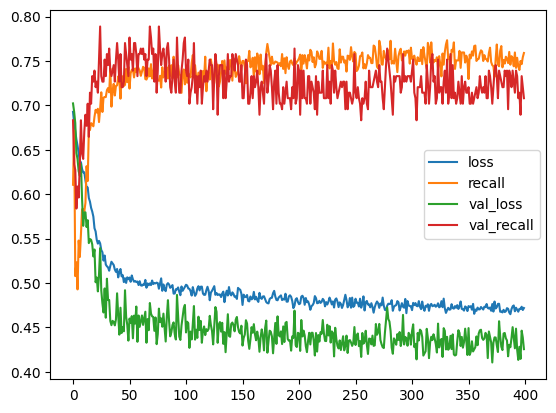

In [58]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [59]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 3ms/step
[[627 169]
 [ 59 145]]
              precision    recall  f1-score   support

           0       0.91      0.79      0.85       796
           1       0.46      0.71      0.56       204

    accuracy                           0.77      1000
   macro avg       0.69      0.75      0.70      1000
weighted avg       0.82      0.77      0.79      1000



#### Monitor the "val_recall" as metric

In [60]:
tf.random.set_seed(seed)
tf.keras.backend.clear_session()

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(10, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(4, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [61]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 200, restore_best_weights = True)


In [62]:
model.fit(x = X_train,
          y = y_train,
          validation_split = 0.1,
          batch_size = 128,
          epochs = 1000,
          verbose = 1,
          class_weight = class_weights,
          callbacks = [early_stop])

Epoch 1/1000
64/64 [==============================] - 2s 8ms/step - loss: 0.7038 - recall: 0.4187 - val_loss: 0.6738 - val_recall: 0.3851
Epoch 2/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.6878 - recall: 0.6830 - val_loss: 0.6736 - val_recall: 0.5839
Epoch 3/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.6752 - recall: 0.6681 - val_loss: 0.6766 - val_recall: 0.6149
Epoch 4/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.6658 - recall: 0.7099 - val_loss: 0.6426 - val_recall: 0.5839
Epoch 5/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.6628 - recall: 0.6854 - val_loss: 0.6407 - val_recall: 0.6025
Epoch 6/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.6599 - recall: 0.6830 - val_loss: 0.6550 - val_recall: 0.6398
Epoch 7/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.6474 - recall: 0.7075 - val_loss: 0.6367 - val_recall: 0.6398
Epoch 8/1000
64/64 [==============

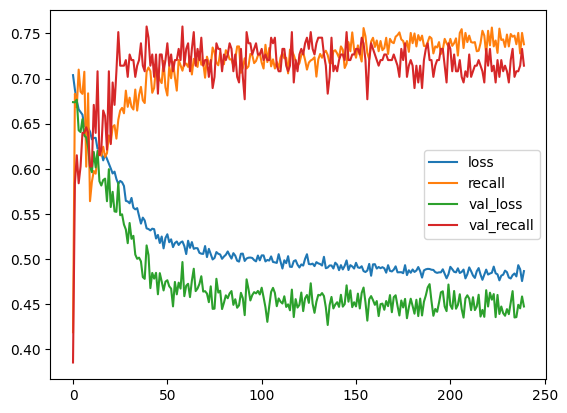

In [63]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [64]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[573 223]
 [ 48 156]]
              precision    recall  f1-score   support

           0       0.92      0.72      0.81       796
           1       0.41      0.76      0.54       204

    accuracy                           0.73      1000
   macro avg       0.67      0.74      0.67      1000
weighted avg       0.82      0.73      0.75      1000



## Optuna

In [65]:
!pip install optuna

In [66]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna

In [67]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [95]:
trial_metric = "Recall"
batch_size = 64


def create_model(trial):

    n_units1 = trial.suggest_int("n_units1", 8, 128)
    n_units2 = trial.suggest_int("n_units2", 8, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1)

    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dense(n_units2, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    model.fit(
        X_train,
        y_train,
        validation_data=(X_test, y_test),
        batch_size=batch_size,
        epochs=100,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = model.evaluate(X_test, y_test, verbose=0)[1]
    return score

In [70]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)
study.best_params

[I 2023-10-30 19:09:26,330] A new study created in memory with name: no-name-3b6d040b-48cf-4a9a-bab2-b798dc1df2f8
<ipython-input-68-123b87d9fa52>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1)
<ipython-input-68-123b87d9fa52>:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  w0 = trial.suggest_loguniform("w0", 0.01, 5)
<ipython-input-68-123b87d9fa52>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  w1 = trial.suggest_loguniform("w1", 0.01

Restoring model weights from the end of the best epoch: 25.
Epoch 40: early stopping


[I 2023-10-30 19:10:46,381] Trial 1 finished with value: 0.9019607901573181 and parameters: {'n_units1': 71, 'n_units2': 21, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.02177575402549983, 'w0': 0.06177184209865163, 'w1': 0.9767090293123969}. Best is trial 1 with value: 0.9019607901573181.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 19:10:57,512] Trial 2 finished with value: 0.9264705777168274 and parameters: {'n_units1': 91, 'n_units2': 42, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 2.4926422158979793e-05, 'w0': 0.16336066168451305, 'w1': 3.0708566192878353}. Best is trial 2 with value: 0.9264705777168274.


Restoring model weights from the end of the best epoch: 19.
Epoch 34: early stopping


[I 2023-10-30 19:11:18,862] Trial 3 finished with value: 0.10784313827753067 and parameters: {'n_units1': 88, 'n_units2': 97, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.08325024615974712, 'w0': 0.09533720872562863, 'w1': 0.01729097115045673}. Best is trial 2 with value: 0.9264705777168274.
[I 2023-10-30 19:12:42,012] Trial 4 finished with value: 0.6764705777168274 and parameters: {'n_units1': 56, 'n_units2': 34, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.008221526446747887, 'w0': 0.02143752909725007, 'w1': 0.09219324954289826}. Best is trial 2 with value: 0.9264705777168274.


Restoring model weights from the end of the best epoch: 20.
Epoch 35: early stopping


[I 2023-10-30 19:13:03,300] Trial 5 finished with value: 0.9950980544090271 and parameters: {'n_units1': 53, 'n_units2': 63, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0012685472540244318, 'w0': 0.04267504101280771, 'w1': 2.4673516443927843}. Best is trial 5 with value: 0.9950980544090271.


Restoring model weights from the end of the best epoch: 20.
Epoch 35: early stopping


[I 2023-10-30 19:13:25,078] Trial 6 finished with value: 0.7401960492134094 and parameters: {'n_units1': 88, 'n_units2': 61, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.010071290774698833, 'w0': 0.04706701567370962, 'w1': 0.2732265674692717}. Best is trial 5 with value: 0.9950980544090271.


Restoring model weights from the end of the best epoch: 12.
Epoch 27: early stopping


[I 2023-10-30 19:13:46,641] Trial 7 finished with value: 0.009803921915590763 and parameters: {'n_units1': 39, 'n_units2': 26, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.05242907225294631, 'w0': 0.3953751861946016, 'w1': 0.045118971319953696}. Best is trial 5 with value: 0.9950980544090271.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 19:13:56,976] Trial 8 finished with value: 0.9852941036224365 and parameters: {'n_units1': 47, 'n_units2': 34, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.032336828836138504, 'w0': 0.026656065716734168, 'w1': 0.5063621443109493}. Best is trial 5 with value: 0.9950980544090271.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 19:14:08,228] Trial 9 finished with value: 0.29901960492134094 and parameters: {'n_units1': 50, 'n_units2': 40, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0023662025554837796, 'w0': 0.013644914720175452, 'w1': 2.4546744439089014}. Best is trial 5 with value: 0.9950980544090271.


{'n_units1': 53,
 'n_units2': 63,
 'optimizer': keras.src.optimizers.rmsprop.RMSprop,
 'learning_rate': 0.0012685472540244318,
 'w0': 0.04267504101280771,
 'w1': 2.4673516443927843}

In [71]:
unit1, unit2, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)

model = Sequential()
model.add(Dense(unit1, activation="relu"))
model.add(Dense(unit2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
model.fit(
    X_train,
    y_train,
    validation_split=0.1,
    batch_size=512,
    epochs=100,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/100
16/16 [==============================] - 1s 17ms/step - loss: 0.5603 - recall: 0.0760 - val_loss: 0.4634 - val_recall: 0.0000e+00
Epoch 2/100
16/16 [==============================] - 0s 7ms/step - loss: 0.4875 - recall: 0.0000e+00 - val_loss: 0.4409 - val_recall: 0.0000e+00
Epoch 3/100
16/16 [==============================] - 0s 7ms/step - loss: 0.4722 - recall: 0.0036 - val_loss: 0.4351 - val_recall: 0.0311
Epoch 4/100
16/16 [==============================] - 0s 7ms/step - loss: 0.4638 - recall: 0.0347 - val_loss: 0.4218 - val_recall: 0.0248
Epoch 5/100
16/16 [==============================] - 0s 7ms/step - loss: 0.4592 - recall: 0.0544 - val_loss: 0.4202 - val_recall: 0.0870
Epoch 6/100
16/16 [==============================] - 0s 6ms/step - loss: 0.4523 - recall: 0.0849 - val_loss: 0.4119 - val_recall: 0.0683
Epoch 7/100
16/16 [==============================] - 0s 9ms/step - loss: 0.4475 - recall: 0.0873 - val_loss: 0.4189 - val_recall: 0.1925
Epoch 8/100
16/16 [=========

In [72]:
history = model.history.history

In [73]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[769  27]
 [114  90]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       796
           1       0.77      0.44      0.56       204

    accuracy                           0.86      1000
   macro avg       0.82      0.70      0.74      1000
weighted avg       0.85      0.86      0.84      1000



# Final Model and Model Deployment

In [74]:
import pickle

pickle.dump(scaler, open("scaler_churn", "wb"))

In [75]:
tf.random.set_seed(seed)
tf.keras.backend.clear_session()

model = Sequential()

model.add(Dense(units = 20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(units = 10, activation = "relu"))
model.add(Dense(units = 1, activation = "sigmoid"))

opt = Nadam(lr = 0.003)

model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 100, restore_best_weights = True)

model.fit(x = X_train,
          y = y_train,
          validation_data = (X_test, y_test),
          callbacks = [early_stop],
          batch_size = 256,
          epochs = 1000,
          verbose = 1,
          class_weight = class_weights)

Epoch 1/1000
36/36 [==============================] - 3s 11ms/step - loss: 0.7077 - recall: 0.9236 - val_loss: 0.7266 - val_recall: 0.7255
Epoch 2/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.6721 - recall: 0.6961 - val_loss: 0.6814 - val_recall: 0.5637
Epoch 3/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.6544 - recall: 0.6067 - val_loss: 0.6802 - val_recall: 0.6176
Epoch 4/1000
36/36 [==============================] - 0s 6ms/step - loss: 0.6389 - recall: 0.6579 - val_loss: 0.6433 - val_recall: 0.5588
Epoch 5/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.6264 - recall: 0.6590 - val_loss: 0.6159 - val_recall: 0.5392
Epoch 6/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.6175 - recall: 0.6470 - val_loss: 0.6353 - val_recall: 0.6569
Epoch 7/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.6108 - recall: 0.6694 - val_loss: 0.6377 - val_recall: 0.6765
Epoch 8/1000
36/36 [=============

<Axes: >

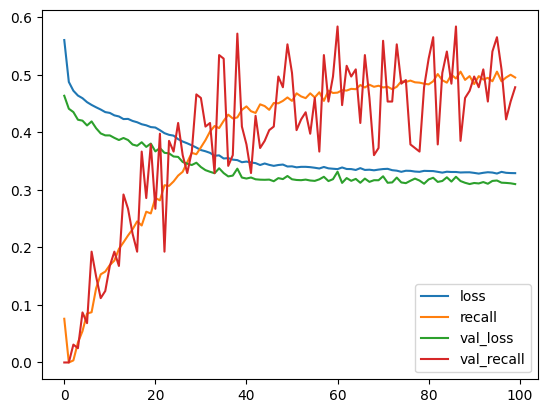

In [76]:
loss_df = pd.DataFrame(history)
loss_df.plot()

In [77]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.5160691142082214
recall:  0.8039215803146362


In [78]:
model.save("model_churn.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [79]:
from tensorflow.keras.models import load_model

In [80]:
model_churn = load_model("model_churn.h5")
scaler_churn = pickle.load(open("scaler_churn", "rb"))

## Prediction

In [81]:
single_customer = df.drop(columns = "Exited").iloc[0]
single_customer

CreditScore           619.00
Gender                  0.00
Age                    42.00
Tenure                  2.00
Balance                 0.00
NumOfProducts           1.00
HasCrCard               1.00
IsActiveMember          1.00
EstimatedSalary    101348.88
geo_France              1.00
geo_Germany             0.00
geo_Spain               0.00
Name: 0, dtype: float64

In [91]:
single_customer = scaler_customer.transform(single_customer)
single_customer

NameError: ignored

In [92]:
y_pred =(model.predict(single_customer) > 0.5).astype("int32")
y_pred

ValueError: ignored

In [90]:
df["Exited"].iloc[0]

1

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___